<a href="https://colab.research.google.com/github/lorenzo1285/Analisis_Fianaciero/blob/main/bonos_vs_capital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga e Importación de paqueterias

In [ ]:
pip install investpy

In [ ]:
pip install numpy-financial

In [ ]:
pip install FinQuant

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import os
from datetime import datetime
import numpy_financial as npf
from finquant.portfolio import build_portfolio
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style("whitegrid")

# Importar Datos

In [ ]:
uploaded = files.upload()

Saving cetes28_22.xlsx to cetes28_22 (1).xlsx


In [ ]:
CETES28 = pd.read_excel('cetes28_22.xlsx')
CETES28.tail()

,Fecha,cetes28
48,2022-02-24,5.94
49,2022-03-03,6.06
50,2022-03-10,6.15
51,2022-03-17,6.33
52,2022-03-24,6.49


In [ ]:
d_1 =  {'Name':['GOOG', 'AMZN','MSFT','AAPL',
                'KO', 'XOM', 'VWO', 'SPY',
                'MCD', 'WMT', 'IBM', 'GS'],
      
      'Allocation':[2727.0,4354.0,33095.0,33600.0,
                    46558.0,19681.0,66900.0,4697.0,
                    22371.0,5335.0,6003.0,4885.0]
        }
df_1 = pd.DataFrame(data=d_1)
df_1.head()

,Name,Allocation
0,GOOG,2727.0
1,AMZN,4354.0
2,MSFT,33095.0
3,AAPL,33600.0
4,KO,46558.0


#Retorno del Portadolio 

In [ ]:
from finquant.portfolio import build_portfolio
names = df_1['Name'].to_list()
start_date = '2017-03-25'
end_date = '2022-03-24'
pf = build_portfolio(names= names,
                     pf_allocation=df_1,
                     start_date= start_date,
                     end_date=end_date,
                     data_api="yfinance")

[*********************100%***********************]  12 of 12 completed


In [ ]:
pf.data.head()

,GOOG,AMZN,MSFT,AAPL,KO,XOM,VWO,SPY,MCD,WMT,IBM,GS
Date,,,,,,,,,,,,
2017-03-27,819.510010,846.820007,60.769863,33.253311,35.998013,62.449005,35.072617,214.082321,114.871010,62.834358,130.279373,205.852036
2017-03-28,820.919983,856.000000,60.947220,33.942551,36.091572,62.902473,35.160107,215.640137,114.835541,63.429684,130.834183,209.366898
2017-03-29,831.409973,874.320007,61.115250,34.018082,36.083069,63.040825,35.212597,215.841766,114.294380,63.808491,130.406860,208.563461
2017-03-30,831.500000,876.340027,61.339275,33.973240,36.236179,64.332092,35.011383,216.529037,114.720207,64.575226,130.346878,211.092361
2017-03-31,829.559998,886.539978,61.479298,33.909512,36.100075,63.033150,34.748924,216.025024,114.977478,65.017212,130.556747,209.722900


In [ ]:
pf.properties()

----------------------------------------------------------------------
Stocks: GOOG, AMZN, MSFT, AAPL, KO, XOM, VWO, SPY, MCD, WMT, IBM, GS
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.185
Portfolio Volatility: 0.189
Portfolio Sharpe Ratio: 0.954

Skewness:
      GOOG      AMZN      MSFT      AAPL        KO       XOM       VWO  \
0  1.11731  0.235478  0.622835  0.725897  0.430968 -0.872874  0.558298   

        SPY       MCD      WMT       IBM        GS  
0  0.788689  0.269427 -0.00149 -0.129803  1.140481  

Kurtosis:
       GOOG      AMZN      MSFT     AAPL        KO       XOM       VWO  \
0 -0.188524 -1.357022 -0.837925 -0.96861 -0.816262  0.299961 -0.811019   

        SPY       MCD       WMT      IBM        GS  
0 -0.703037 -0.903985 -1.373241  0.23415 -0.084684  

Information:
    Name  Allocation
0   GOOG      2727.0
1   AMZN      4354.0
2   MSFT     33095.0
3   AAPL     33600.0
4     KO     46558.0
5    XOM     19681.0
6    VWO     66900.0
7    S

In [ ]:
weights = pf.comp_weights()
weights

0     0.010899
1     0.017402
2     0.132271
3     0.134289
4     0.186079
5     0.078659
6     0.267380
7     0.018773
8     0.089410
9     0.021322
10    0.023992
11    0.019524
Name: Allocation, dtype: float64

In [ ]:
df_1['weights'] = weights
df_1

,Name,Allocation,weights
0,GOOG,2727.0,0.010899
1,AMZN,4354.0,0.017402
2,MSFT,33095.0,0.132271
3,AAPL,33600.0,0.134289
4,KO,46558.0,0.186079
5,XOM,19681.0,0.078659
6,VWO,66900.0,0.267380
7,SPY,4697.0,0.018773
8,MCD,22371.0,0.089410
9,WMT,5335.0,0.021322


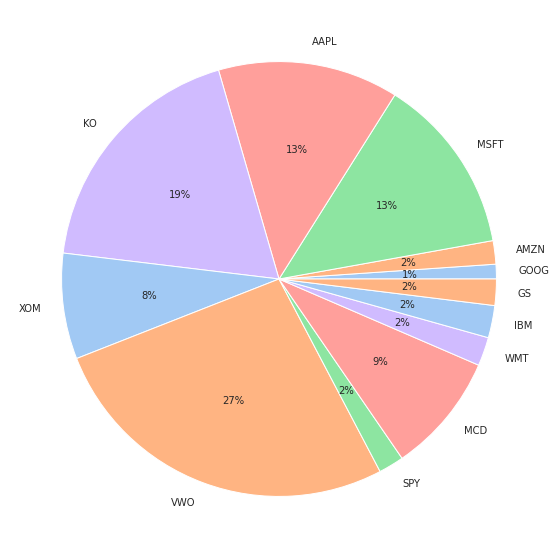

In [ ]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(weights,labels=df_1['Name'],colors=colors,autopct='%.0f%%')
plt.show()

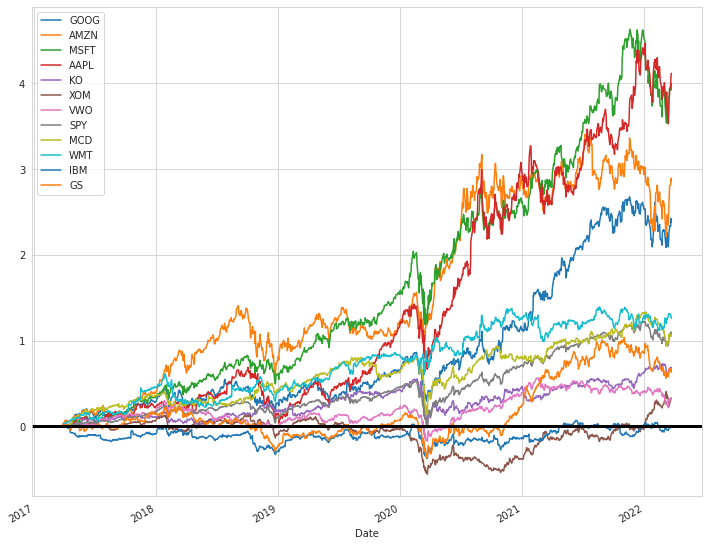

In [ ]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)
plt.rcParams["figure.figsize"] = (12, 12)
plt.show()

In [ ]:
pf.comp_mean_returns(freq=252)

GOOG    0.283352
AMZN    0.319124
MSFT    0.360030
AAPL    0.375559
KO      0.124784
XOM     0.106122
VWO     0.077600
SPY     0.165065
MCD     0.171921
WMT     0.187467
IBM     0.032529
GS      0.149121
dtype: float64

/usr/local/lib/python3.7/dist-packages/finquant/monte_carlo.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


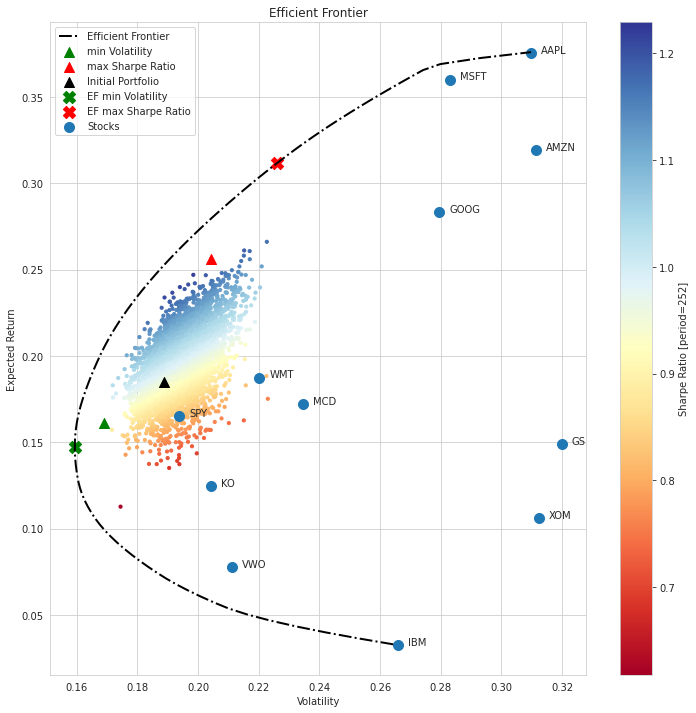

In [ ]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()
plt.rcParams["figure.figsize"] = (12, 10)

In [ ]:
# Tasa Efectiva 
def tasa_efectiva(i,n):
  
  # i = tasa de interes anual
  # n = numero de periodos
  
  tasaf = ((1+ i/n)**n)-1
  return round(tasaf, 5)

In [ ]:
# Rentabilidad a 5 años del portafolio 
retorno = round(pf.comp_expected_return(), 5)
n = 5
tasa_fpf = tasa_efectiva(retorno, n)
print('Tasa Efectiva esperada a 5 años')
tasa_fpf

Tasa Efectiva esperada a 5 años


0.1994

# Retorno Cetes 28

In [ ]:
CETES28.set_index(keys=CETES28['Fecha'], inplace=True)

In [ ]:
#CETES28.drop(labels='Fecha', axis=1, inplace=True)
CETES28.tail()

,cetes28
Fecha,
2022-02-24,5.94
2022-03-03,6.06
2022-03-10,6.15
2022-03-17,6.33
2022-03-24,6.49


In [ ]:
plazo = 28 #Plazo 
vn = 20000000 #Valor Nominal 
i = CETES28['cetes28'].iloc[-1]/100 #Tasa de descuento

In [ ]:
def precio_descontado(vn, n, i):

  # vn = valor nominal 
  # n = plazo
  # i = tasa de descuento 
  
  P =  vn*(1-((n*i)/360))
  return round(P, 5)

In [ ]:
precio_des = precio_descontado(vn,plazo,i)
print('Precio descontado ó Costo del CETE28')
precio_des #Costo del CETE28

Precio descontado ó Costo del CETE28


19899044.44444

In [ ]:
def tasaf_plazo(vn, p):

  #vn = Valor Nominal
  #p = precio descontado
  i = (vn/p)-1 
  
  return round(i,5)

In [ ]:
tasa_efectiva_plazo = tasaf_plazo(vn, precio_des)
print('Tasa efectiva del plazo')
tasa_efectiva_plazo


Tasa efectiva del plazo


0.00507

In [ ]:
def tasa_nominal(i,n,t):

  # i = tasa efectiva del plazo
  # n = plazo
  # t = tiempo

  i_t = (i/n)*t
  return round(i_t, 5)

In [ ]:
tasa_n = tasa_nominal(tasa_efectiva_plazo, plazo, 360)
print('tasa nominal a valor descontado')
tasa_n

tasa nominal a valor descontado


0.06519

In [ ]:
# Tasa Real
def tasa_real(f,inf):

  # f = tasa efectiva
  # inf = inflación

  tasa = (f - inf) / (1 + inf)
  return round(tasa, 5)

In [ ]:
tasarCetes = tasa_real(tasa_n, .065)
tasarCetes*100

0.018000000000000002

In [ ]:
tasarpf = tasa_real(tasa_fpf, .065)
tasarpf

0.1262